# Team 403 CIS 515 Final Project

In [ ]:
!nvidia-smi

Mon Apr 22 05:48:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              48W / 400W |    897MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.8/201.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 139.3ms
Speed: 6.5ms preprocess, 139.3ms inference, 535.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


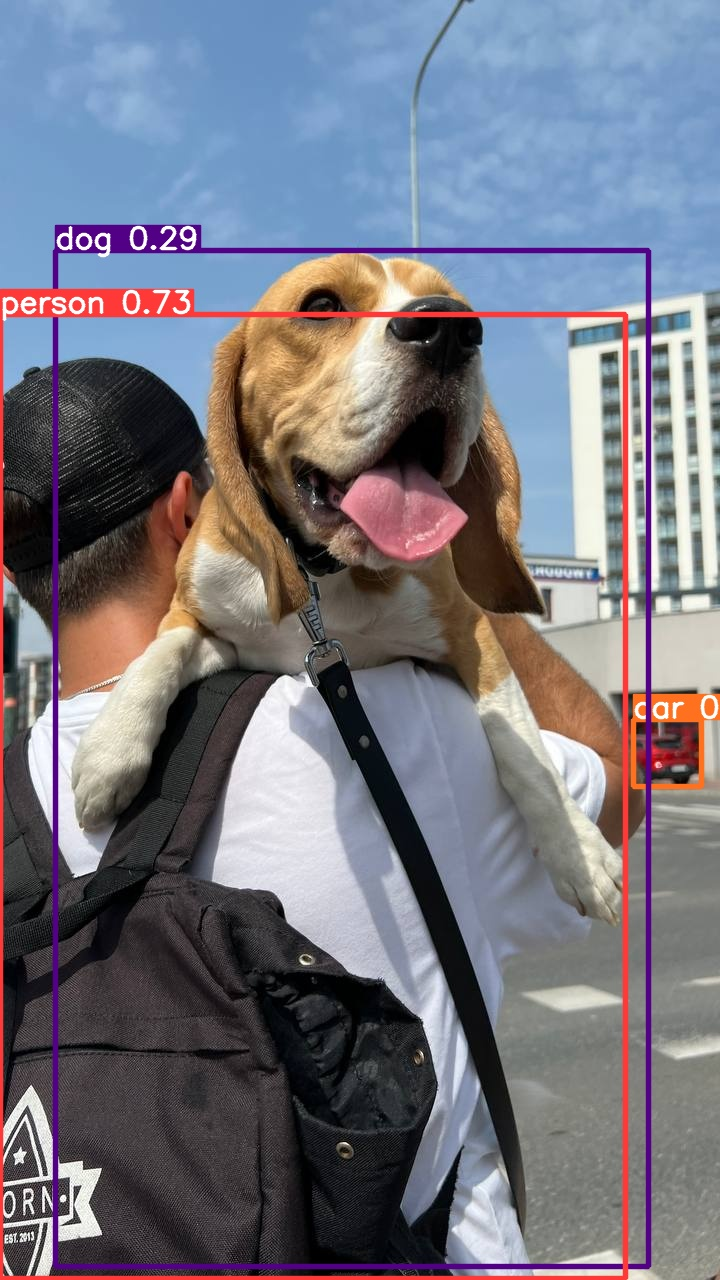

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4778,  625.0481, 1278.1838],
        [  55.2606,  250.0206,  648.1104, 1266.2628],
        [ 633.2289,  719.5337,  701.0597,  786.0325]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7269, 0.2911, 0.2840], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SJDR1Y4uPqSkN9jMf5TK")
project = rf.workspace("cis515-ozzwn").project("cis-515-final-project")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=150 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/CIS-515-Final-Project-1/data.yaml, epochs=150, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 train_batch5567.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1713746137.32f5ae145323.5595.0  roboflow_deploy.zip  val_batch1_labels.jpg
F1_curve.png					    state_dict.pt	 val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch2_labels.jpg
labels.jpg					    train_batch1.jpg	 val_batch2_pred.jpg
model_artifacts.json				    train_batch2.jpg	 weights
P_curve.png					    train_batch5565.jpg
PR_curve.png					    train_batch5566.jpg


/content


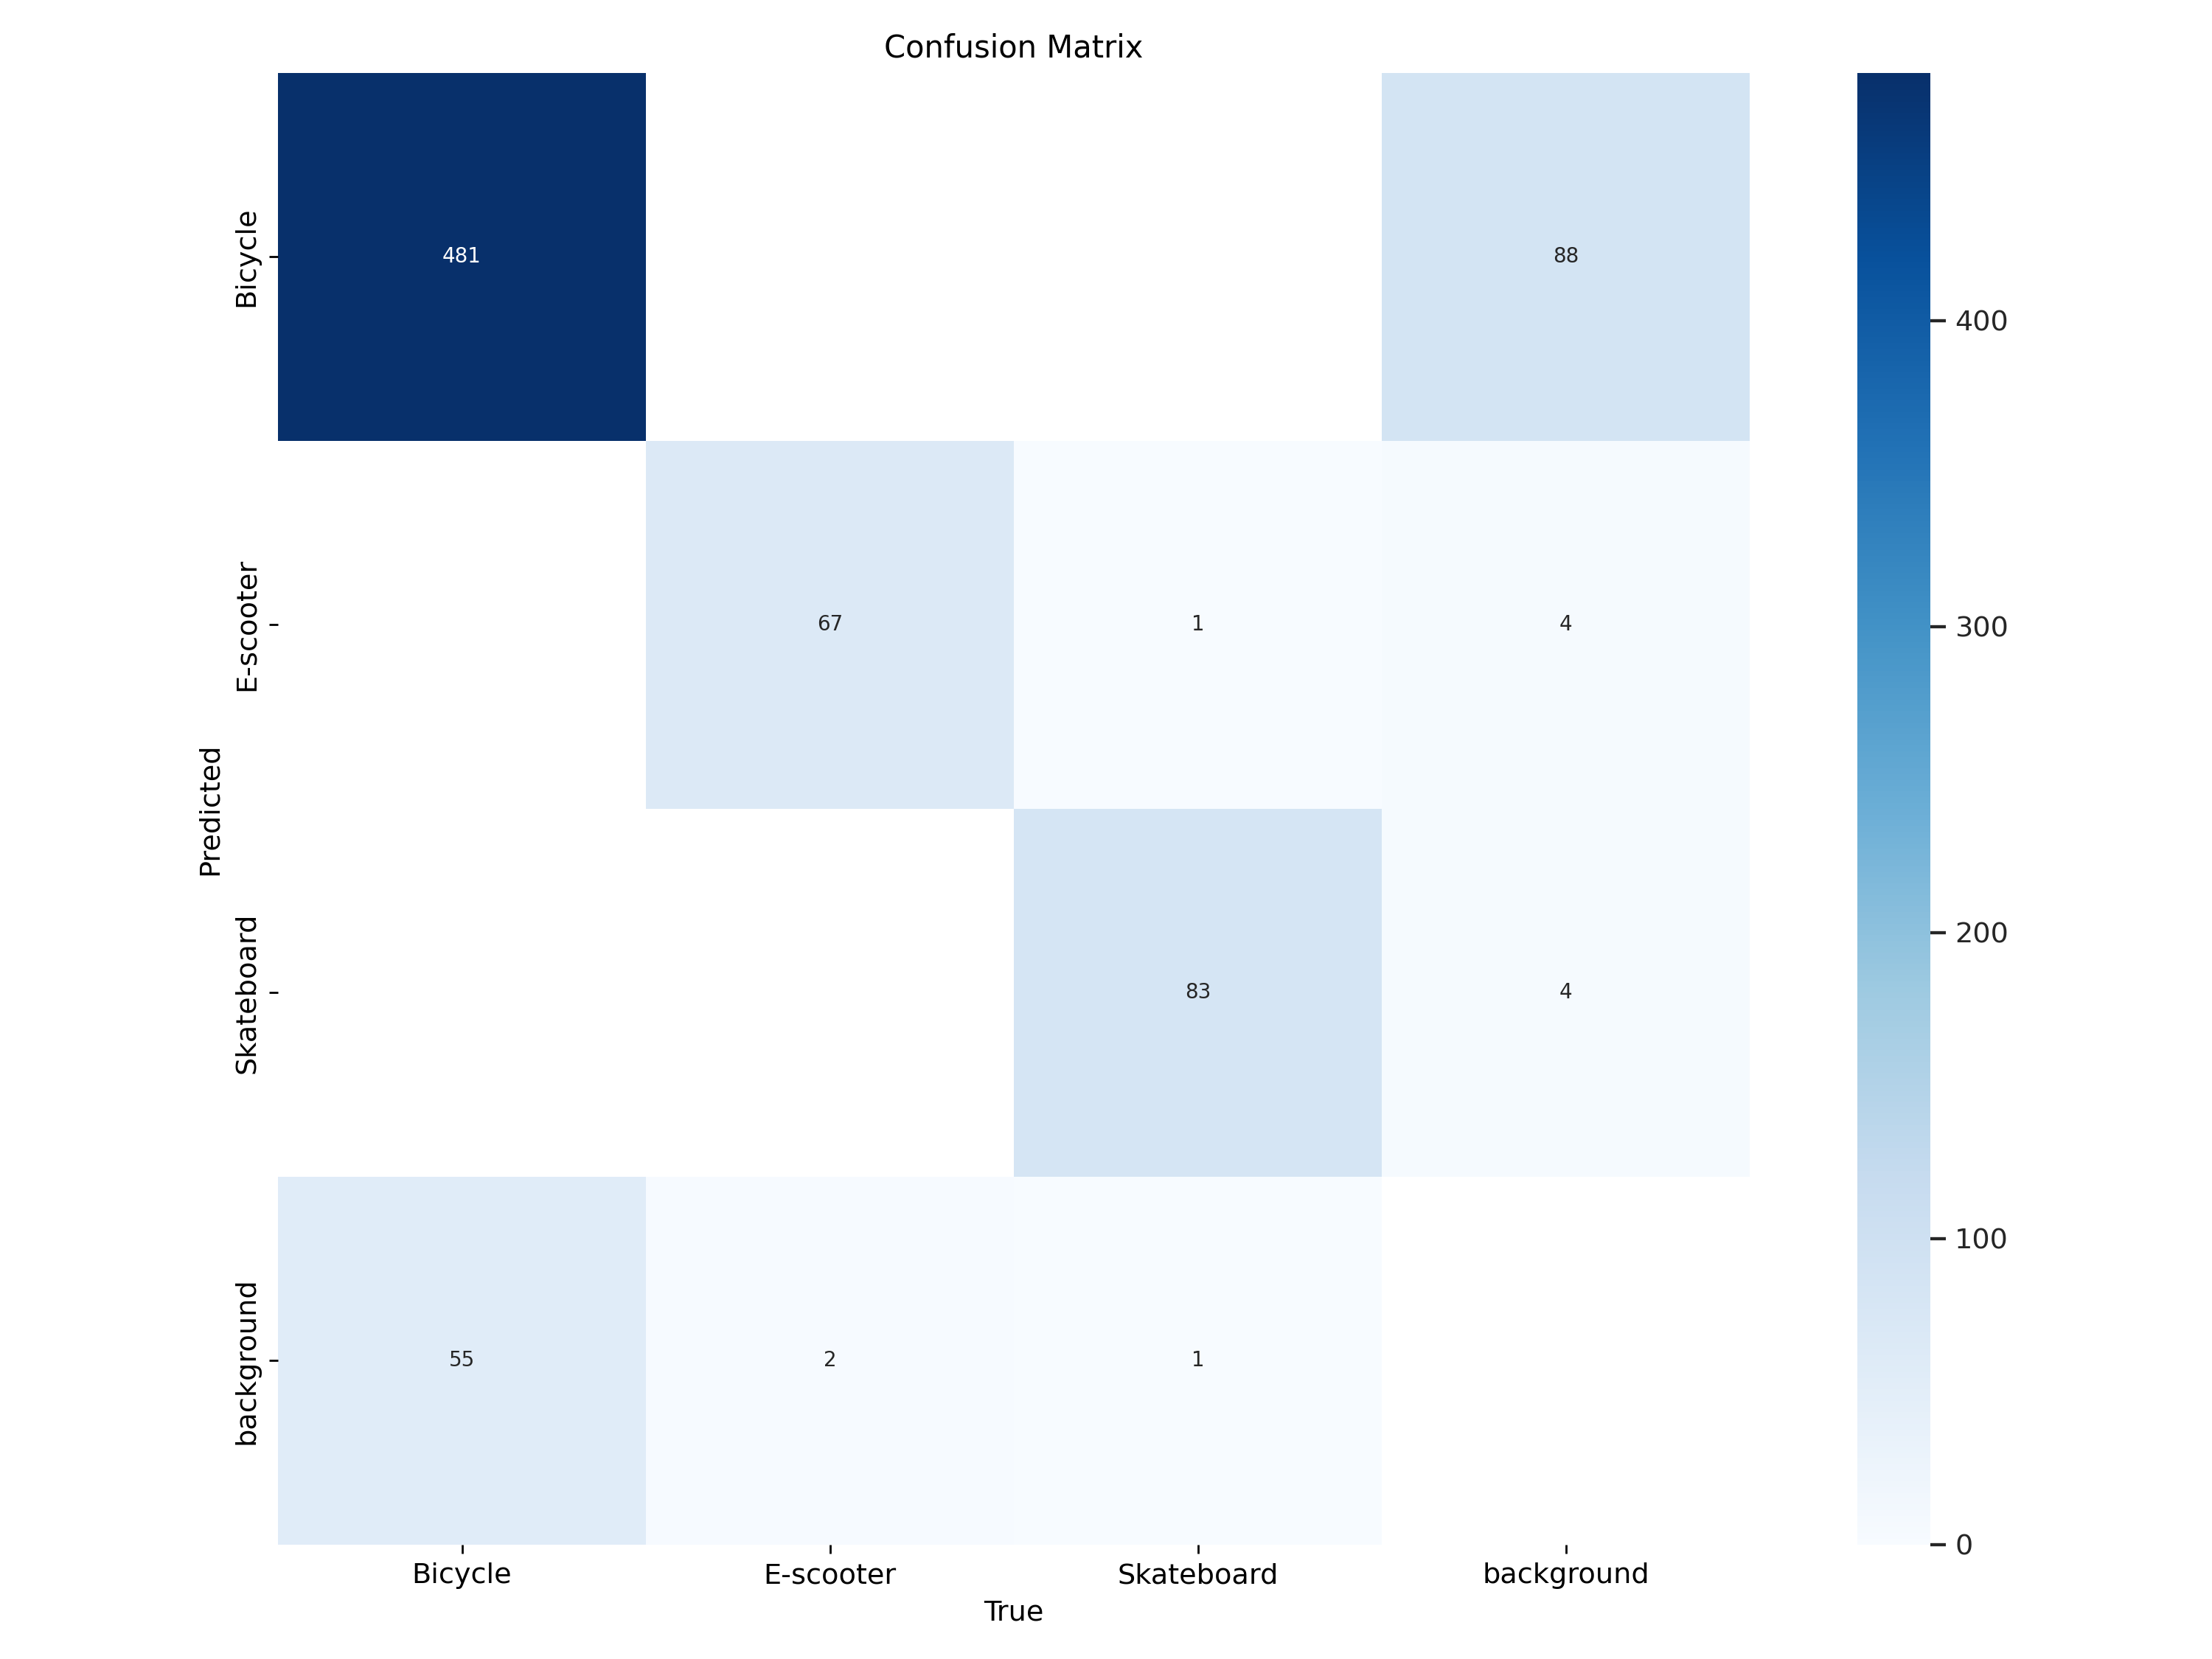

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


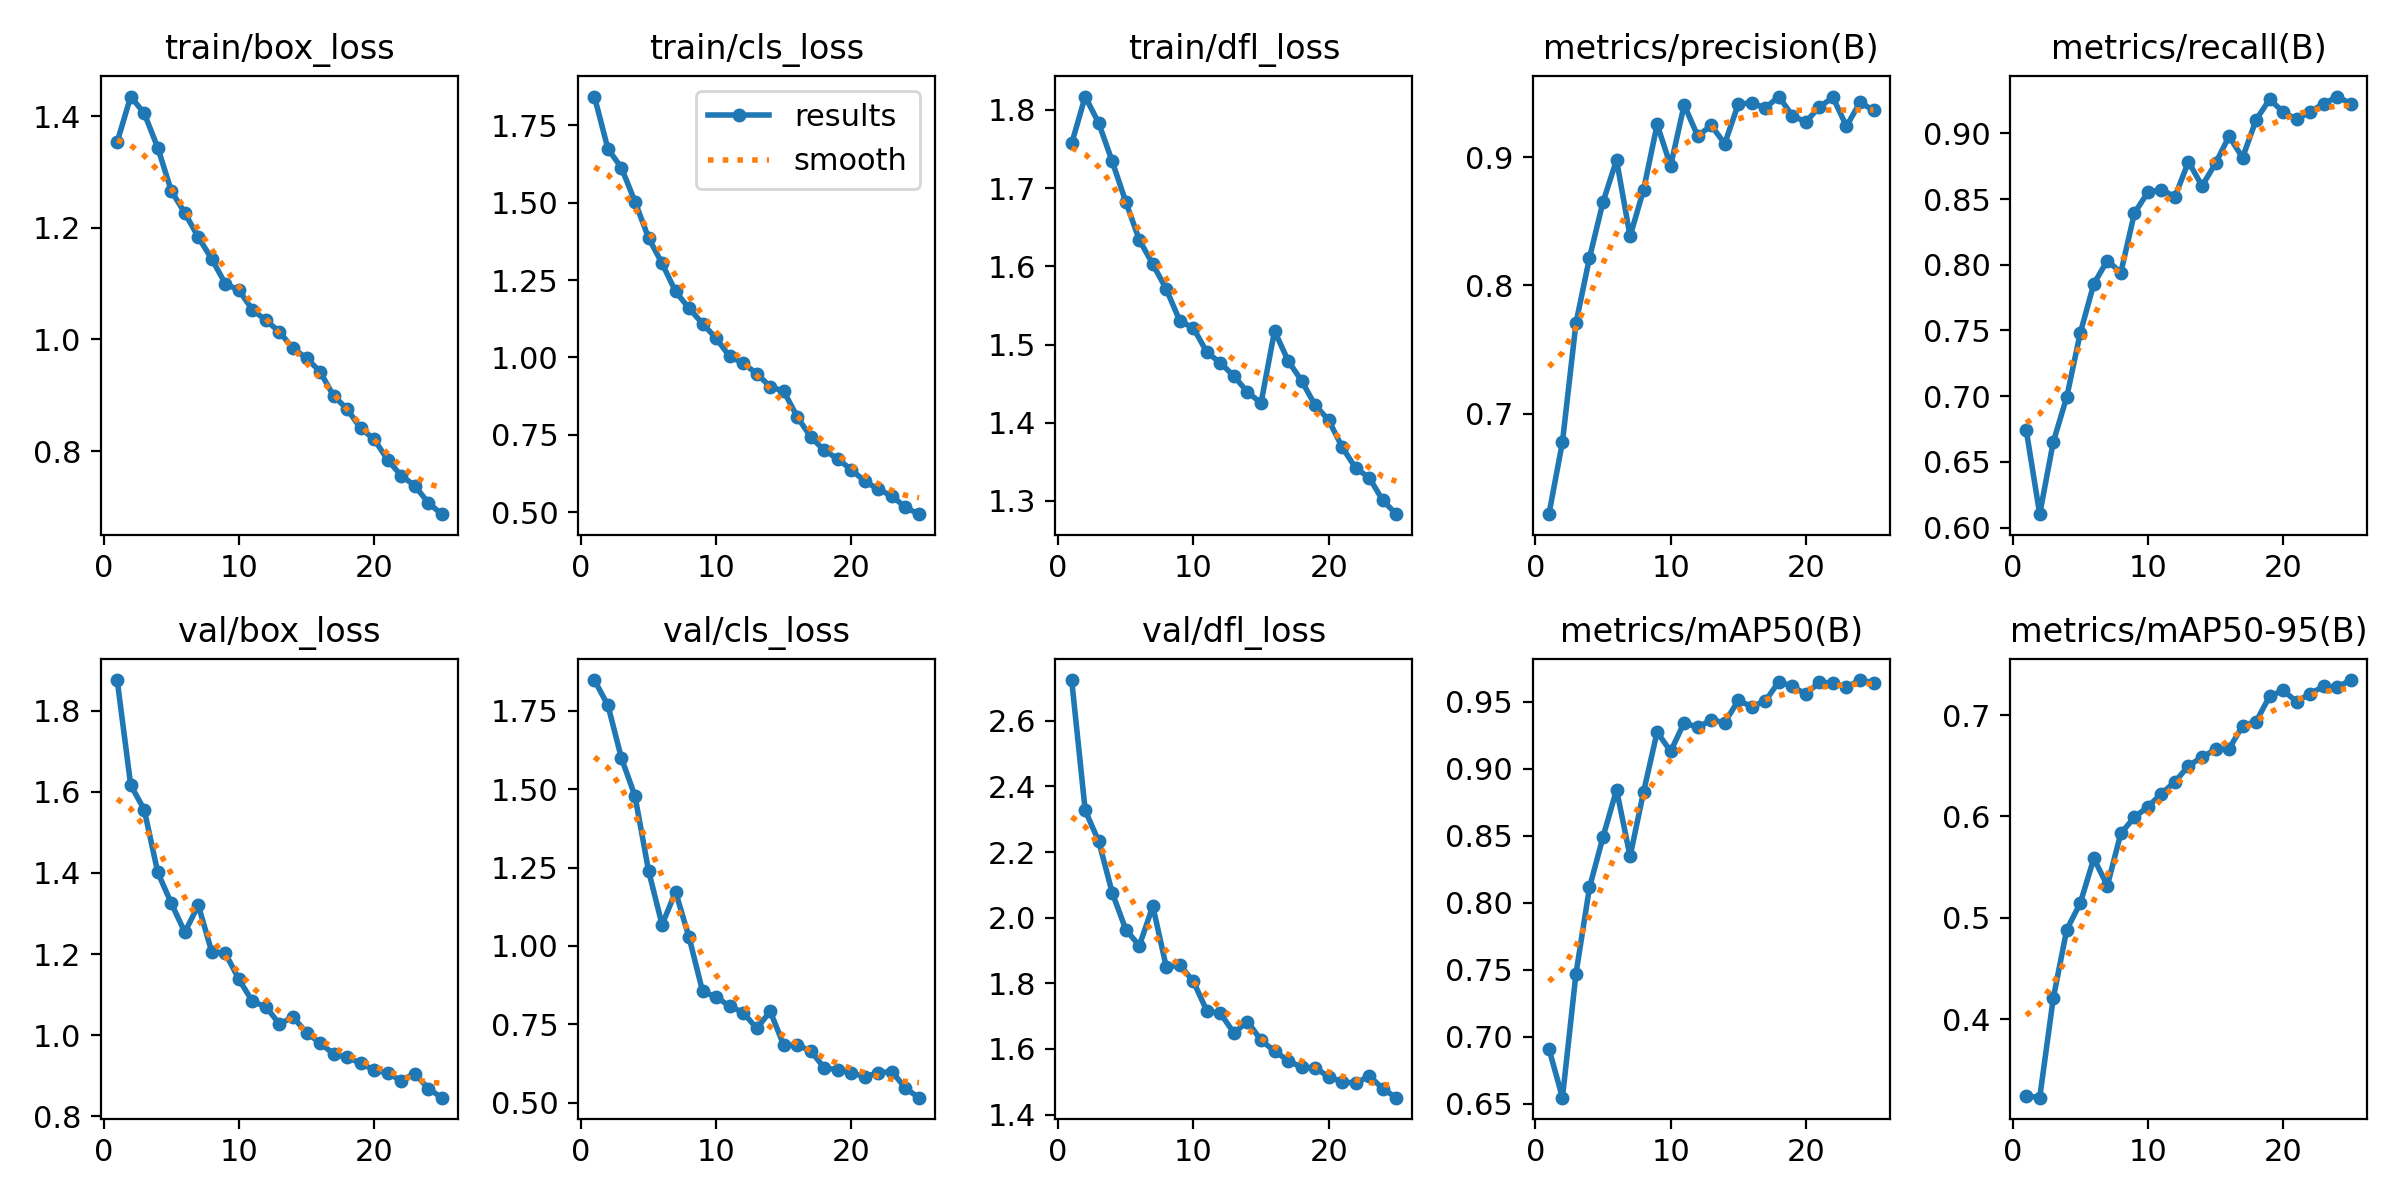

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


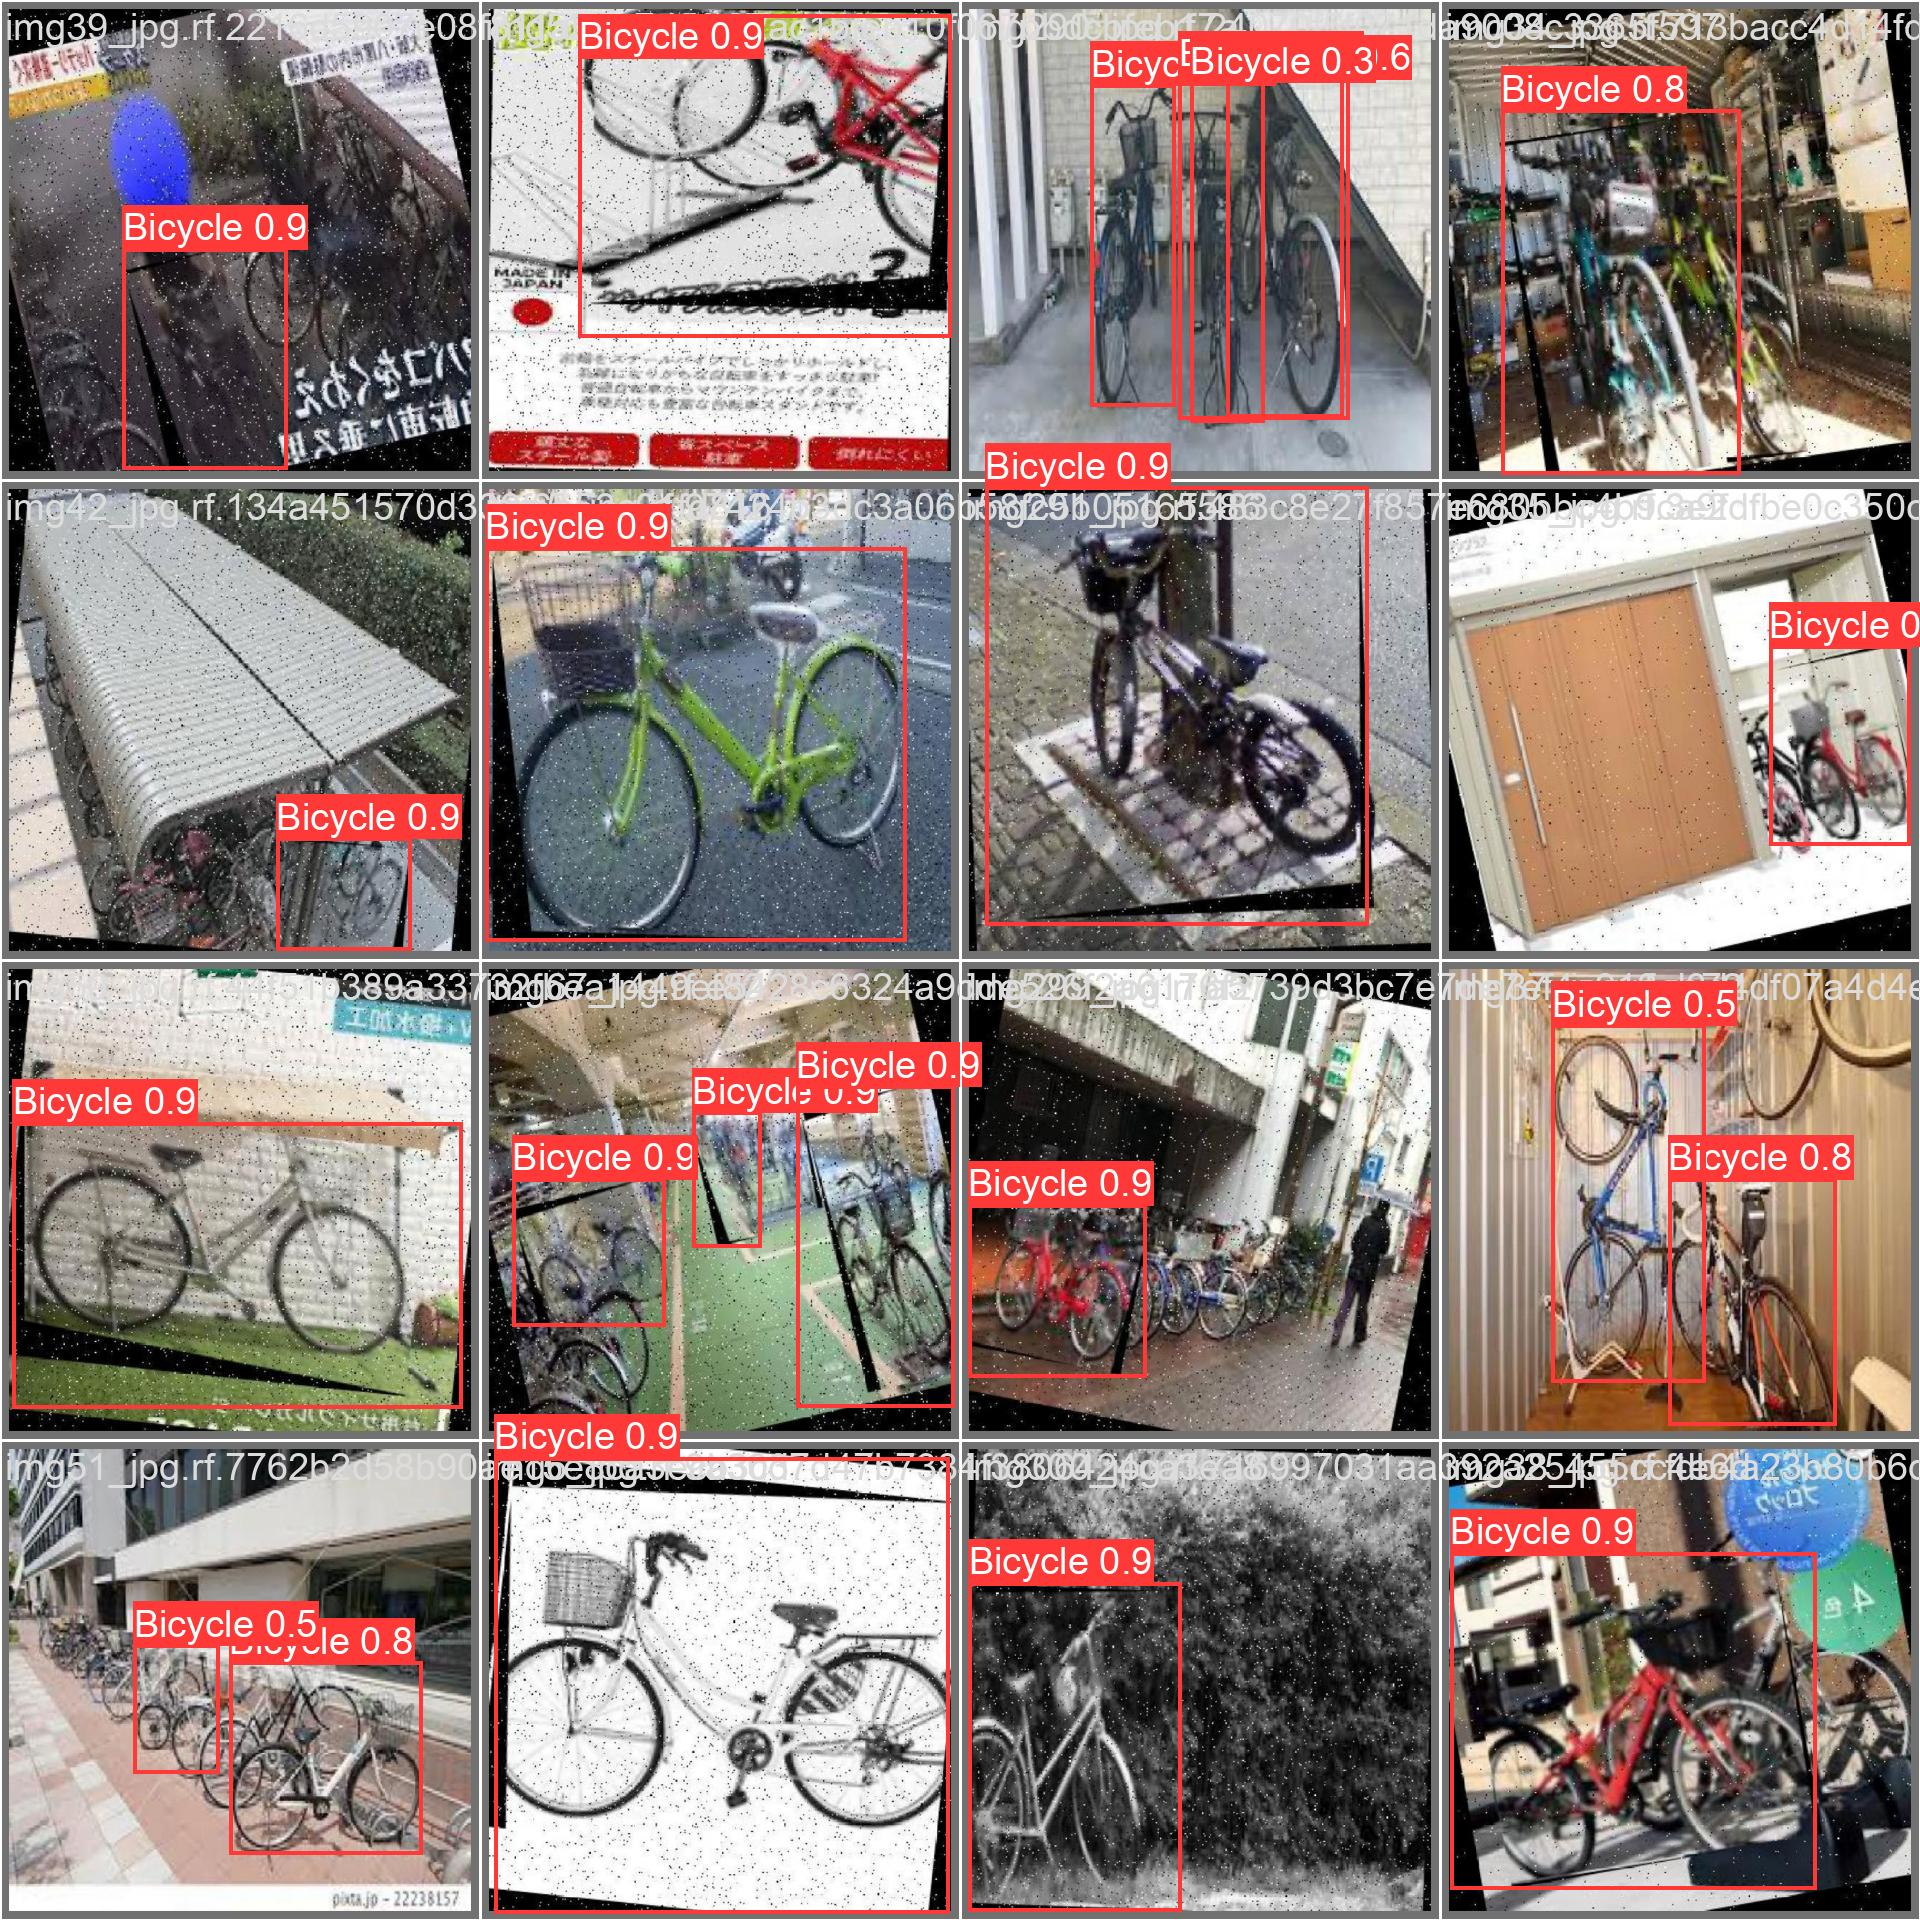

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/CIS-515-Final-Project-1/valid/labels.cache... 494 images, 0 backgrounds, 0 corrupt: 100% 494/494 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:06<00:00,  5.12it/s]
                   all        494        690      0.939      0.922      0.964      0.735
               Bicycle        494        536      0.929      0.832      0.935      0.739
             E-scooter        494         69      0.929      0.971      0.984      0.853
            Skateboard        494     

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000900_jpg.rf.c919d30b2a9c93bf7b4c4096599c7dce.jpg: 800x800 1 E-scooter, 7.9ms
image 2/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000930_jpg.rf.be506008331580636d0e10a8be15e2e9.jpg: 800x800 2 E-scooters, 8.2ms
image 3/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000946_jpg.rf.3946e29a7303a6ee14ee5c9447ad31bc.jpg: 800x800 1 E-scooter, 7.6ms
image 4/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000951_jpg.rf.950e7d9b51ad8ab3d8355270aa39d394.jpg: 800x800 1 E-scooter, 7.7ms
image 5/275 /content/datasets/CIS-515-Final-Project-1/test/images/00001026_jpg.rf.dcca6017f12e9d79afb4bf869a433dbd.jpg: 800x800 1 E-scooter, 7.8ms
image 6/275 /content/datasets/CIS-515-Final-Project-1/test/images/000010

**NOTE:** Let's take a look at few results.

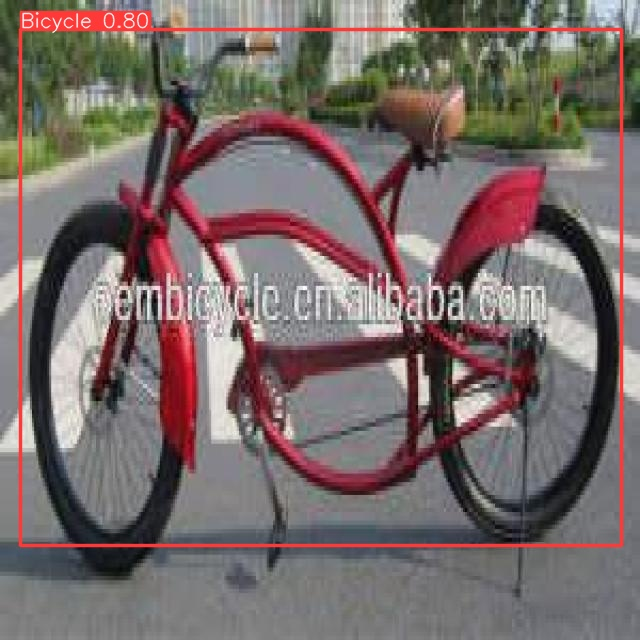

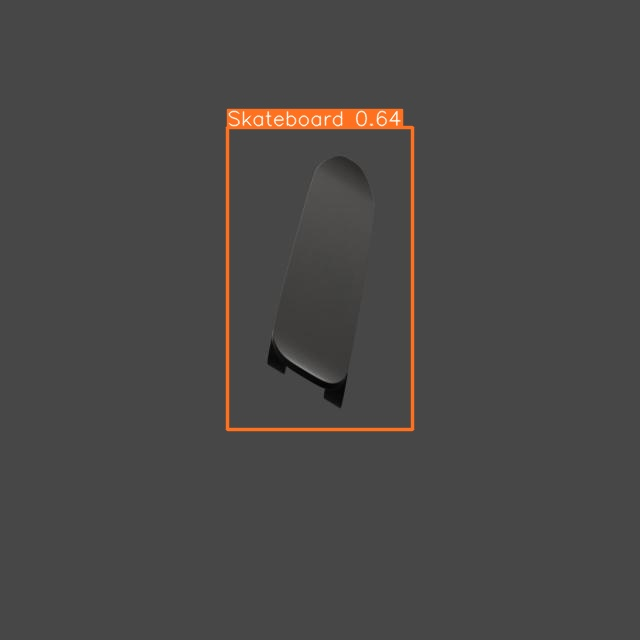

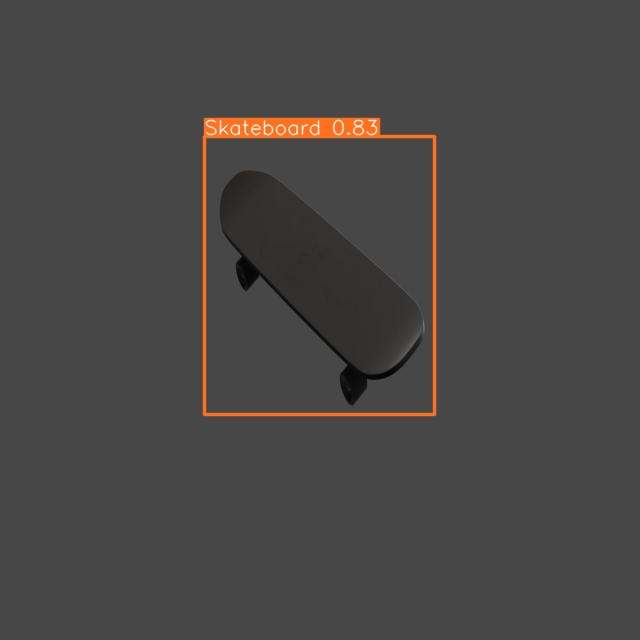

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/4605386-uhd_4096_2160_25fps.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 145.6ms
video 1/1 (2/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.8ms
video 1/1 (3/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.4ms
video 1/1 (4/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.4ms
video 1/1 (5/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.3ms
video 1/1 (6/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.7ms
video 1/1 (7/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.4ms
video 1/1 (8/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.7ms
video 1/1 (9/302) /content/4605386-uhd_4096_2160_25fps.mp4: 448x800 2 Bicycles, 8.2ms
video 1/1 (10/302) /content/4605386-uhd_4